**Introduction**

In the fast-paced world of quick commerce, effective supply chain management is critical to ensuring timely delivery, optimal inventory levels, and customer satisfaction. This analysis focuses on Blinkit, one of India's leading instant delivery platforms, and aims to evaluate key components of its supply chain performance.

Using real order, inventory, delivery ,product, order_items and customer data, this study dives into several core areas:

    Identifying top-selling products,

    Analyzing inventory trends in relation to demand,

    Evaluating stock quality,

    Understanding delivery delays in terms of time, location, and product type.   


By uncovering patterns across inventory movement and delivery behavior, the goal is to highlight operational inefficiencies and provide actionable insights to enhance supply chain responsiveness and reliability. This analysis is structured to answer critical business questions, such as:

    Which products and categories are driving sales?
   
    How well is inventory managed in relation to demand?

    Where and why are delivery delays occurring?

    What operational improvements can be made to enhance delivery efficiency?
 
Through data-driven insights, this analysis aims to support better decision-making and operational improvements across Blinkit's supply chain ecosystem.


In [34]:
#Import the data set 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")




In [174]:
#uploading necessary data

#Inventory data
df_inventory= pd.read_csv("blinkit_inventory.csv")

#Orders data
df_order=pd.read_csv("blinkit_orders.csv")

#order items
df_order_items=pd.read_csv("blinkit_order_items.csv")

#product data

df_product=pd.read_csv("blinkit_products.csv")


In [175]:
# Preview top rows
print(df_inventory.head(),"\n,\n")
print(df_order_items.head(),"\n,\n")
print(df_product.head(),"\n,\n")
print(df_order.head(),"\n,\n")

# Check missing values
print(df_inventory.isnull().sum(),"\n,\n")
print(df_order_items.isnull().sum(),"\n,\n")
print(df_product.isnull().sum(),"\n,\n")
print(df_order.isnull().sum(),"\n,\n")


   product_id        date  stock_received  damaged_stock
0      153019  17-03-2023               4              2
1      848226  17-03-2023               4              2
2      965755  17-03-2023               1              0
3       39154  17-03-2023               4              0
4       34186  17-03-2023               3              2 
,

     order_id  product_id  quantity  unit_price
0  1961864118      642612         3      517.03
1  1549769649      378676         1      881.42
2  9185164487      741341         2      923.84
3  9644738826      561860         1      874.78
4  5427684290      602241         2      976.55 
,

   product_id product_name             category                    brand  \
0      153019       Onions  Fruits & Vegetables               Aurora LLC   
1       11422     Potatoes  Fruits & Vegetables           Ramaswamy-Tata   
2      669378     Potatoes  Fruits & Vegetables          Chadha and Sons   
3      848226     Tomatoes  Fruits & Vegetables           

In [176]:
# checking  information related to inventory data set


df_inventory.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75172 entries, 0 to 75171
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      75172 non-null  int64 
 1   date            75172 non-null  object
 2   stock_received  75172 non-null  int64 
 3   damaged_stock   75172 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.3+ MB


**All datatypes are accurate except date column convert object to datetime**

In [177]:
#convert date column to datetime 

df_inventory["date"]=pd.to_datetime(df_inventory["date"])
df_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75172 entries, 0 to 75171
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product_id      75172 non-null  int64         
 1   date            75172 non-null  datetime64[ns]
 2   stock_received  75172 non-null  int64         
 3   damaged_stock   75172 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.3 MB


In [39]:
#Info related to product data set

df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB


In [40]:
# info related to order_items

df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    5000 non-null   int64  
 1   product_id  5000 non-null   int64  
 2   quantity    5000 non-null   int64  
 3   unit_price  5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


In [41]:
#info related to order

df_order.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


**Convert date column to datetime**


In [178]:
#convert date column to datetime 

df_order["order_date"]=pd.to_datetime(df_order["order_date"])
df_order["promised_delivery_time"]=pd.to_datetime(df_order["promised_delivery_time"])
df_order["actual_delivery_time"]=pd.to_datetime(df_order["actual_delivery_time"])
df_order.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5000 non-null   int64         
 1   customer_id             5000 non-null   int64         
 2   order_date              5000 non-null   datetime64[ns]
 3   promised_delivery_time  5000 non-null   datetime64[ns]
 4   actual_delivery_time    5000 non-null   datetime64[ns]
 5   delivery_status         5000 non-null   object        
 6   order_total             5000 non-null   float64       
 7   payment_method          5000 non-null   object        
 8   delivery_partner_id     5000 non-null   int64         
 9   store_id                5000 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(4), object(2)
memory usage: 390.8+ KB


# Inventory Analysis

**Top Selling Product**

In [179]:
#Finding Top Selling Product

top_selling = df_order_items.groupby('product_id')['quantity'].sum().reset_index()
top_selling = top_selling.sort_values(by='quantity', ascending=False)

# Merge with product id
top_selling = top_selling.merge(df_product[['product_id', 'product_name',"category"]], on='product_id', how='left')
top_selling.head(20)  # Top 20 best-selling products


,product_id,quantity,product_name,category
0,51036,70,Baby Food,Baby Care
1,820973,68,Baby Wipes,Baby Care
2,604184,62,Toilet Cleaner,Household Care
3,34186,61,Mangoes,Fruits & Vegetables
4,992178,60,Pain Reliever,Pharmacy
5,880510,58,Bread,Dairy & Breakfast
6,673058,56,Cough Syrup,Pharmacy
7,89084,56,Milk,Dairy & Breakfast
8,557908,55,Vitamins,Pharmacy
9,123983,55,Cough Syrup,Pharmacy


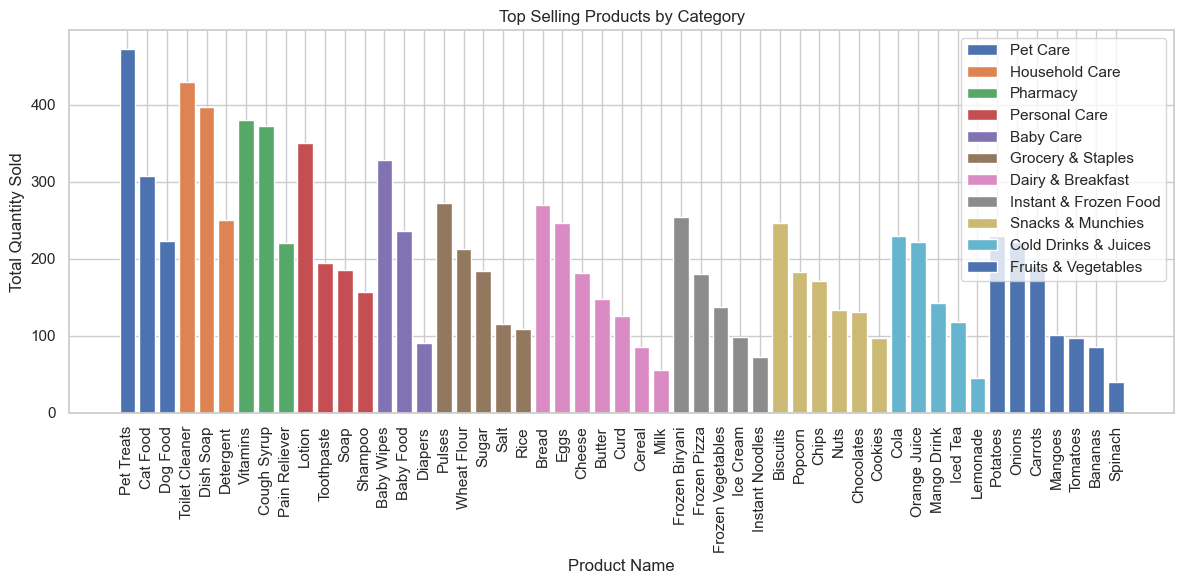

In [180]:
# Top selling product by category

grouped_category_data=top_selling.groupby(["product_name","category"])["quantity"].sum().reset_index()

# Sort for better visuals (optional)
grouped_category_data = grouped_category_data.sort_values(by="quantity", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
for cat in grouped_category_data['category'].unique():
    subset = grouped_category_data[grouped_category_data['category'] == cat]
    plt.bar(subset['product_name'], subset['quantity'], label=cat)

plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top Selling Products by Category')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()



**The analysis shows that products in categories such as Pet Care, Household Care, Pharmacy, Personal Care, and Baby Care are among the top-selling items. These categories consistently record higher sales volumes compared to others. In contrast, Fruits and Vegetables, along with other food-related categories, show significantly lower sales performance.**

**This trend suggests that customers may be prioritizing essential non-perishable or personal well-being products over fresh or perishable food items. It could also indicate a shift in shopping behavior, where consumers rely more on external sources (like local markets or meal delivery) for fresh produce while turning to retail outlets for healthcare, hygiene, and household essentials.**

**Inventory Trends Stock vs Demand**

In [45]:
# consider the no of stock recived is the usable stock since the total stock is stock recived + damage_Stock

df_inventory["stock_received"].value_counts()

stock_received
3    29447
0    28411
4    13957
1     3357
Name: count, dtype: int64

In [46]:
# separating yr and month
df_inventory['month'] = df_inventory['date'].dt.to_period('M')

monthly_stock = df_inventory.groupby(['month', 'product_id'])['stock_received'].sum().reset_index()
monthly_stock

# need to use the stock received  as usable stock

,month,product_id,stock_received
0,2023-03,4452,6
1,2023-03,6405,17
2,2023-03,9436,11
3,2023-03,11422,15
4,2023-03,14145,17
...,...,...,...
5613,2024-11,970529,3
5614,2024-11,990993,4
5615,2024-11,991434,3
5616,2024-11,992178,6


In [47]:
# Merge to get order_date in order_items
df_order_items = df_order_items.merge(df_order[['order_id', 'order_date']], on='order_id')

df_order_items['month'] = df_order_items['order_date'].dt.to_period('M')

# Sum of quantity ordered = demand
monthly_demand = df_order_items.groupby(['month', 'product_id'])['quantity'].sum().reset_index()
monthly_demand.rename(columns={'quantity': 'total_demand'}, inplace=True)
monthly_demand.sort_values(by="total_demand",ascending=False)


,month,product_id,total_demand
454,2023-06,123983,14
1118,2023-10,222892,14
295,2023-05,240179,12
3233,2024-10,880510,12
1647,2024-01,256783,12
...,...,...,...
1083,2023-09,965755,1
458,2023-06,136533,1
2680,2024-07,563740,1
2681,2024-07,564692,1


In [48]:
stock_demand = pd.merge(monthly_stock, monthly_demand, on=['month', 'product_id'], how='outer')


# Fill missing values

#fill missing values as 0 since null values is there is no stock received or no total demand for that product

stock_demand['stock_received'] = stock_demand['stock_received'].fillna(0)
stock_demand['total_demand'] = stock_demand['total_demand'].fillna(0)

# Calculate surplus or shortage
stock_demand['surplus_or_shortage'] = stock_demand['stock_received'] - stock_demand['total_demand'] #> 0 → Surplus (more stock than demand)
                                                                                                  #< 0 → Shortage (demand exceeds stock)
stock_demand

,month,product_id,stock_received,total_demand,surplus_or_shortage
0,2023-03,4452,6.0,0.0,6.0
1,2023-03,6405,17.0,0.0,17.0
2,2023-03,9436,11.0,2.0,9.0
3,2023-03,11422,15.0,2.0,13.0
4,2023-03,14145,17.0,3.0,14.0
...,...,...,...,...,...
5615,2024-11,991434,3.0,0.0,3.0
5616,2024-11,992178,6.0,3.0,3.0
5617,2024-11,993331,4.0,0.0,4.0
5618,2024-11,51036,0.0,1.0,-1.0


In [49]:

#merge product table

product_info = df_product[['product_id', 'product_name', 'category', 'min_stock_level', 'max_stock_level']]

stock_demand = stock_demand.merge(product_info, on='product_id', how='left')

stock_demand.head(25)


,month,product_id,stock_received,total_demand,surplus_or_shortage,product_name,category,min_stock_level,max_stock_level
0,2023-03,4452,6.0,0.0,6.0,Baby Wipes,Baby Care,27,100
1,2023-03,6405,17.0,0.0,17.0,Baby Food,Baby Care,11,81
2,2023-03,9436,11.0,2.0,9.0,Toothpaste,Personal Care,19,76
3,2023-03,11422,15.0,2.0,13.0,Potatoes,Fruits & Vegetables,20,65
4,2023-03,14145,17.0,3.0,14.0,Spinach,Fruits & Vegetables,14,53
5,2023-03,15314,13.0,1.0,12.0,Cheese,Dairy & Breakfast,30,91
6,2023-03,18035,18.0,0.0,18.0,Dish Soap,Household Care,12,87
7,2023-03,26060,19.0,0.0,19.0,Vitamins,Pharmacy,25,57
8,2023-03,33797,14.0,3.0,11.0,Pain Reliever,Pharmacy,12,51
9,2023-03,33955,14.0,1.0,13.0,Frozen Pizza,Instant & Frozen Food,29,84


In [50]:

# Calculate stock_in_hand for each row
stock_demand['stock_in_hand'] = stock_demand['stock_received'] - stock_demand['total_demand']



#  Sort the DataFrame by product_id and month
stock_demand = stock_demand.sort_values(by=['product_id', 'month'])

#  Calculate cumulative stock after demand is met
stock_demand['cumulative_stock_after_demand'] = stock_demand.groupby('product_id')['stock_in_hand'].cumsum()

# sort by month again if needed
stock_demand = stock_demand.sort_values(by='month')

# Final DataFrame
print(stock_demand[['month', 'product_id', 'stock_received', 'total_demand', 'stock_in_hand', 'cumulative_stock_after_demand']])


        month  product_id  stock_received  total_demand  stock_in_hand  \
0     2023-03        4452             6.0           0.0            6.0   
19    2023-03       57405            12.0           0.0           12.0   
265   2023-03      991434            11.0           1.0           10.0   
116   2023-03      473929             8.0           0.0            8.0   
217   2023-03      818522            16.0           1.0           15.0   
...       ...         ...             ...           ...            ...   
5516  2024-11      647462             4.0           0.0            4.0   
5430  2024-11      298985             9.0           0.0            9.0   
5431  2024-11      300159             0.0           0.0            0.0   
5606  2024-11      954722             3.0           0.0            3.0   
5617  2024-11      993331             4.0           0.0            4.0   

      cumulative_stock_after_demand  
0                               6.0  
19                             12.0

In [51]:
# Group by month and category, calculate the mean of key metrics
grouped = stock_demand.groupby(['month', 'category']).agg({
    'min_stock_level': 'mean',
    'max_stock_level': 'mean',
    'total_demand': 'mean',
    'cumulative_stock_after_demand': 'mean'
}).round(0).reset_index()

# Rename for cleaner plots
grouped.rename(columns={
    'min_stock_level': 'avg_min_stock',
    'max_stock_level': 'avg_max_stock',
    'total_demand': 'avg_demand',
    'cumulative_stock_after_demand': 'avg_cumulative_stock'
}, inplace=True)


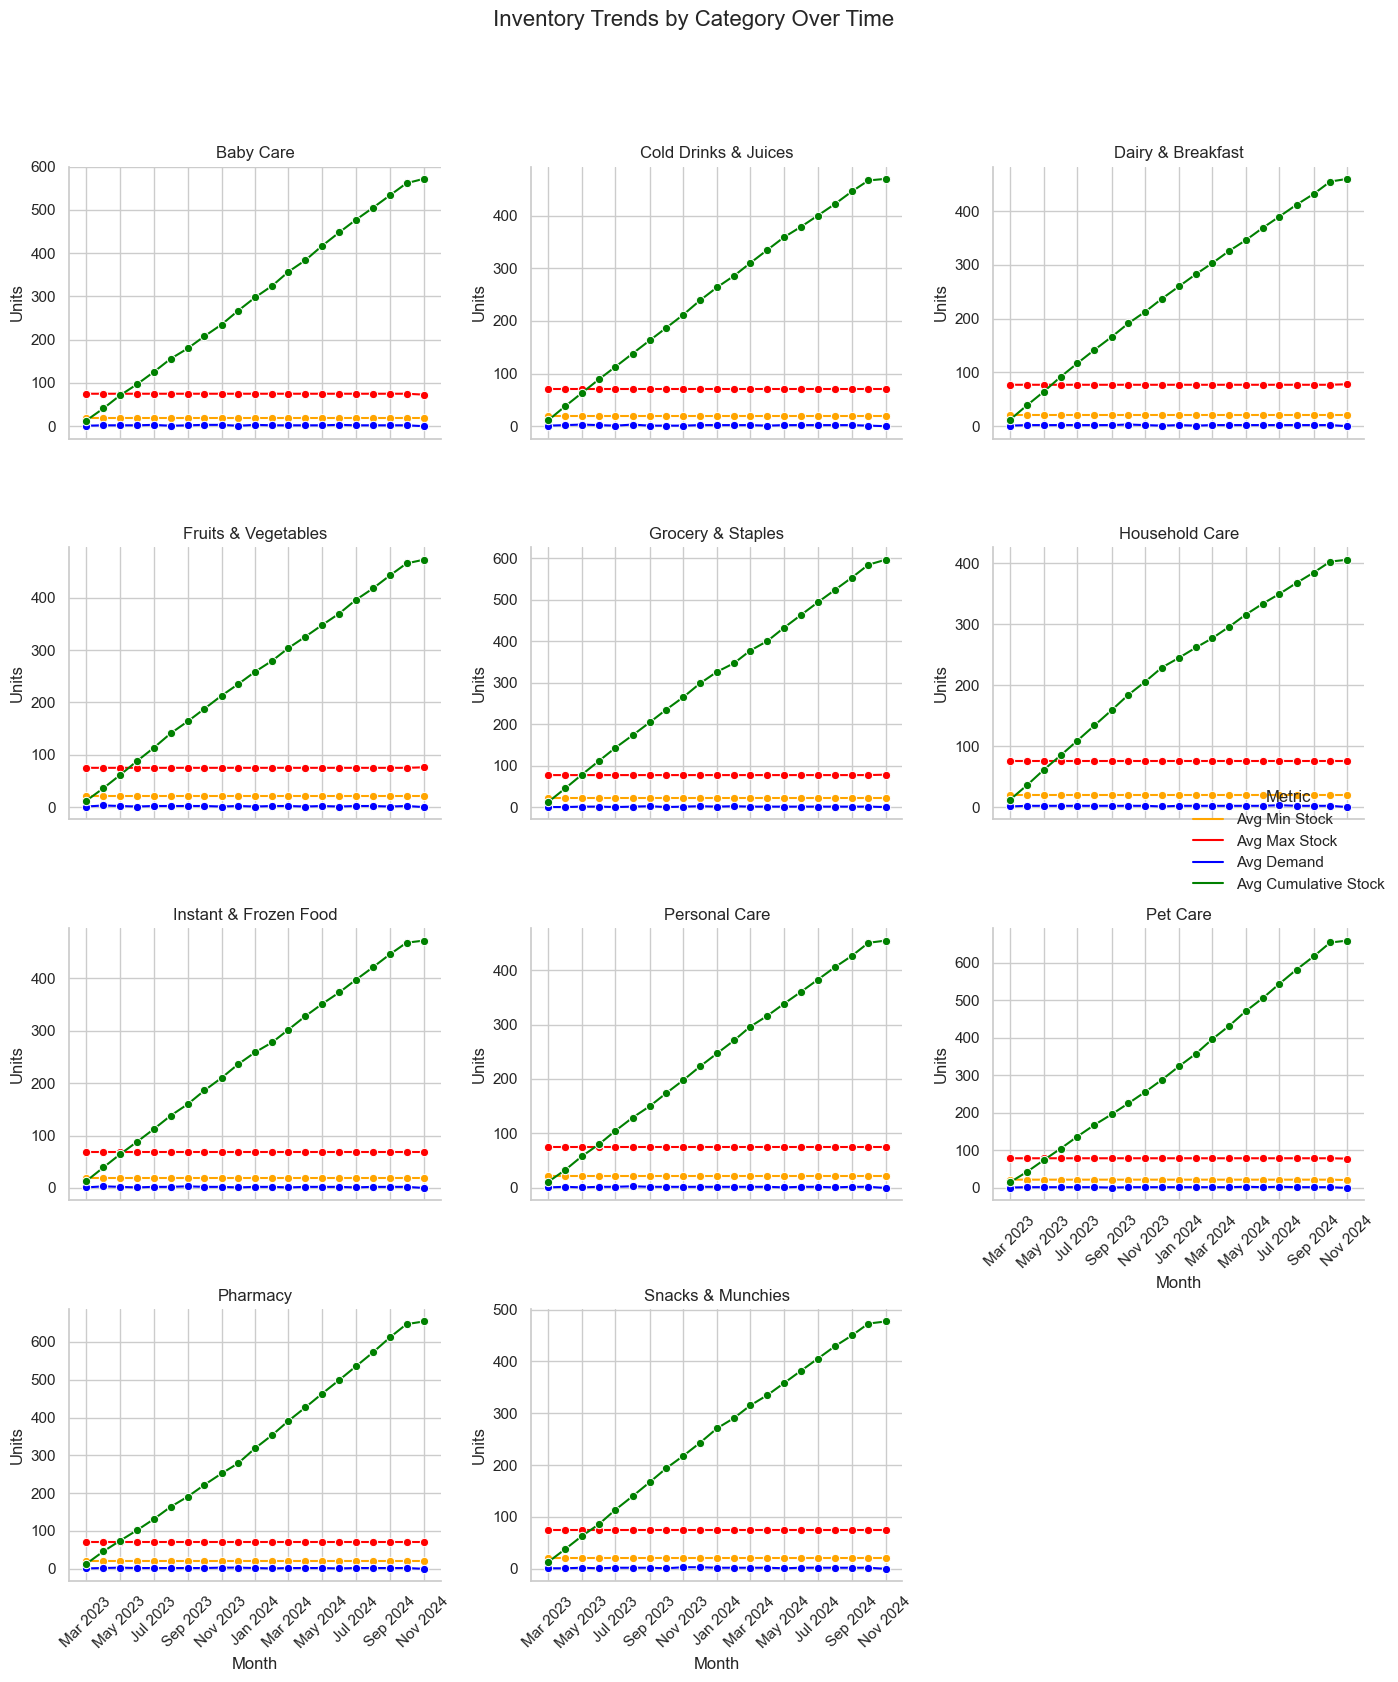

In [52]:
grouped['month'] = grouped['month'].dt.to_timestamp()

# Set style
sns.set(style="whitegrid")

# Set custom colors for each metric
palette = {
    'Avg Min Stock': 'orange',
    'Avg Max Stock': 'red',
    'Avg Demand': 'blue',
    'Avg Cumulative Stock': 'green'
}

# Melt the DataFrame for easier plotting
df_melted = grouped.melt(
    id_vars=['month', 'category'],
    value_vars=['avg_min_stock', 'avg_max_stock', 'avg_demand', 'avg_cumulative_stock'],
    var_name='Metric',
    value_name='Value'
)

# Rename metrics for better legend labels
df_melted['Metric'] = df_melted['Metric'].map({
    'avg_min_stock': 'Avg Min Stock',
    'avg_max_stock': 'Avg Max Stock',
    'avg_demand': 'Avg Demand',
    'avg_cumulative_stock': 'Avg Cumulative Stock'
})

# Create the FacetGrid
g = sns.FacetGrid(df_melted, col="category", col_wrap=3, height=4, sharey=False)

# Plot with color and marker
g.map_dataframe(
    sns.lineplot,
    x="month", y="Value", hue="Metric", palette=palette, marker="o"
)

# Adjust x-axis formatting and rotate labels
for ax in g.axes.flat:
    ax.set_xlabel("Month")
    ax.set_ylabel("Units")
    ax.xaxis.set_major_formatter(
        plt.matplotlib.dates.DateFormatter("%b %Y")  # Format: Mar 2023
    )
    ax.tick_params(axis='x', rotation=45)

# Manage legends
g.add_legend(title="Metric", label_order=[
    "Avg Min Stock", "Avg Max Stock", "Avg Demand", "Avg Cumulative Stock"
])
g.set_titles("{col_name}")
g.fig.suptitle("Inventory Trends by Category Over Time", fontsize=16, y=1.05)

plt.tight_layout()
plt.show()


Based on the average calculations across category and month, we observe several key trends and opportunities for operational improvement in inventory management:

Note:since we don't have previous year records, for analysis purpose the initial stock on hand is assumed to be 0. So from Jan starting the year, the stock on hand is calculated based on incoming stock received to outgoing demand and cumulatively added for following months. Doing that it was observed in March all products exceeded the max stock level. In actual these stock levels could have been breached earlier based on past years' stock on hand. At the same time since there isn't much information on expiry date for these products, the actual stock on hand could be lesser as products might have gone expired. However they still would have contributed loss to the company due to overstock reason compared to demand which the analysis focus on. There isn't also any information available regarding company's action to deplete these excess stocks, either by promoting sales or stopping new orders. So they aren't accounted for in this analysis.


**Key Observations**

   **Demand vs Minimum Stock Level**

   Across most categories, the average demand closely aligns with the minimum stock level, indicating that stock replenishment is occurring just in time to meet basic customer requirements.

   However, in many cases, demand is consistently lower than the maximum stock level, suggesting that a significant amount of inventory remains unused for prolonged periods.

   **Excess Inventory in March 2023**

   A noticeable spike is seen in March 2023, where most categories reached or exceeded their maximum stock levels. This points to either over-ordering or inaccurate demand forecasting for that period.

   This raises concern, especially since there was no corresponding spike in demand, leading to potential excess holding costs and risk of product expiry, especially in perishable categories.

  Inefficient Use of Storage Resources

   Maintaining inventory that consistently exceeds demand results in waste of storage space and contributes to higher warehousing costs.

   The mismatch between supply and demand leads to reduced inventory turnover, tying up working capital and operational resources.

**Areas Requiring Deeper Investigation**

    
   Perishable Categories
   
   For categories like:

       Fruits & Vegetables

        Snacks & Munchies

        Dairy & Breakfast

   It's critical to incorporate expiry date analysis to determine:

        How much inventory was wasted due to expiry before consumption.

        Whether stock rotation practices (FIFO/LIFO) are being followed.

        If perishable goods are being overstocked in anticipation of demand that never materializes.

    
   **Static Stock Thresholds (Min/Max Values)**

   We observed no significant variation in minimum and maximum stock thresholds over time or in response to demand fluctuations.

   This lack of adaptability suggests that stock level policies are static, potentially set manually and not revised based on seasonal trends, promotions, or consumption patterns.

   Revisiting these thresholds using demand forecasting models could optimize replenishment frequency and reduce unnecessary inventory buildup.

**Monthly Average Demand Based on Category for Two Different Years**

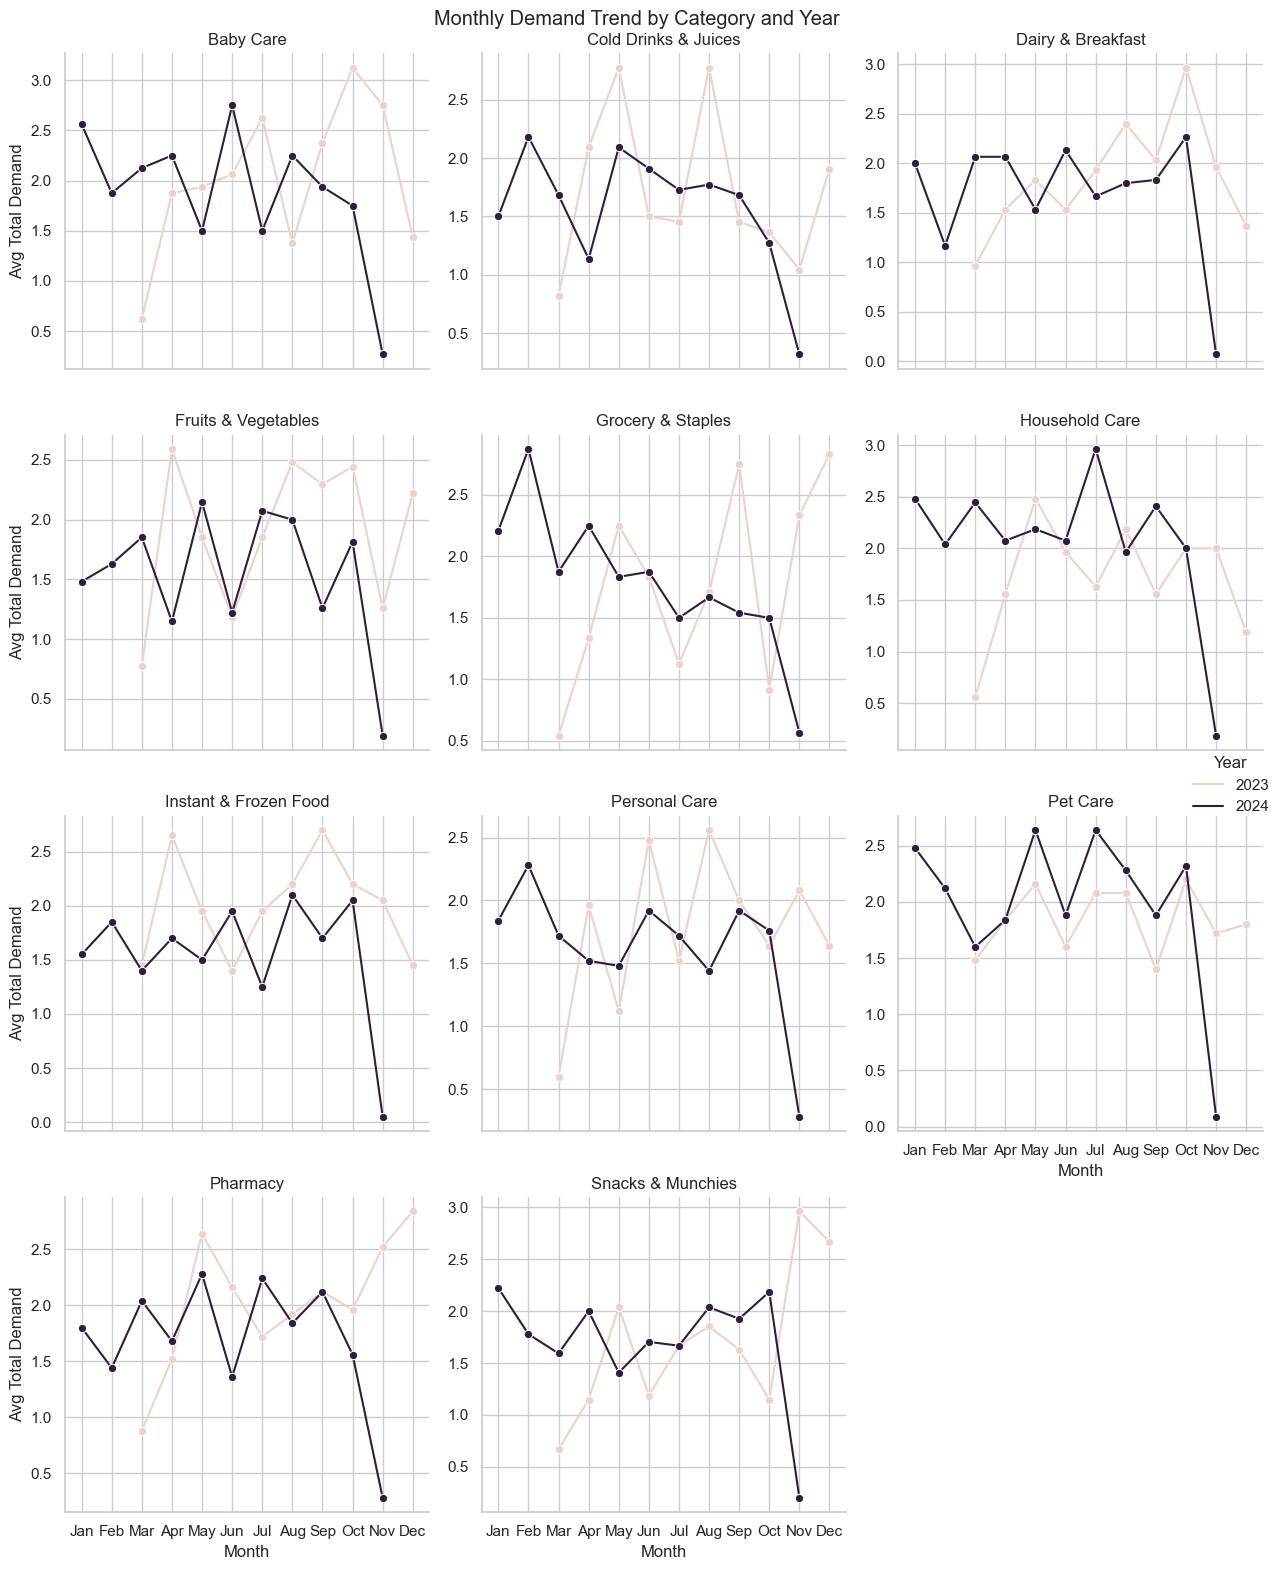

In [53]:
from pandas.api.types import CategoricalDtype

# Step 1: If 'month' is a Period type, convert it to Timestamp
if pd.api.types.is_period_dtype(stock_demand['month']):
    stock_demand['month'] = stock_demand['month'].dt.to_timestamp()

# Step 2: Extract year and month name
stock_demand['year'] = stock_demand['month'].dt.year
stock_demand['month_only'] = stock_demand['month'].dt.strftime('%b')  # Jan, Feb, etc.

# Step 3: Group by year, month name, and category
monthly_category_year = (
    stock_demand.groupby(['year', 'month_only', 'category'])['total_demand']
    .mean()
    .reset_index()
)

# Step 4: Sort months in calendar order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_cat = CategoricalDtype(categories=month_order, ordered=True)
monthly_category_year['month_only'] = monthly_category_year['month_only'].astype(month_cat)

# Step 5: Plot using seaborn FacetGrid
g = sns.FacetGrid(
    monthly_category_year,
    col='category',
    col_wrap=3,
    height=4,
    sharey=False
)

g.map_dataframe(
    sns.lineplot,
    x='month_only',
    y='total_demand',
    hue='year',
    marker='o'
)

g.add_legend(title='Year')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Month", "Avg Total Demand")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Monthly Demand Trend by Category and Year")
plt.tight_layout()
plt.show()


**In November 2024, there was a clear drop in demand across all categories, which may indicate external factors like holidays, supplier delays, or pricing changes that impacted overall sales. This trend warrants a deeper look into inventory flow, seasonality, and promotional activities during that period.**

**Categories such as Pet Care and Household Care have shown improved performance in 2024 compared to 2023, possibly due to increased consumer interest, better availability, or marketing efforts. These segments show potential for continued growth.**

**In contrast, Grocery & Staples, Fruits & Vegetables, Instant & Frozen Food, and Personal Care have seen a slight decline in demand this year. This could stem from overstocking, demand saturation, or a shift toward alternative products.**

**Analyzing pricing strategies, stock availability, and competitor performance during these months could provide better insight into the causes. This evaluation will also help in adjusting procurement and marketing efforts going forward.**

**Stock Quality: Received vs Damaged Stock**

In [68]:
#Merge inventory and product table

stock_damage_df=pd.merge(df_inventory,df_product[["product_id","product_name","category"]],how="inner",on="product_id")

stock_damage_df

,product_id,date,stock_received,damaged_stock,product_name,category
0,153019,2023-03-17,4,2,Onions,Fruits & Vegetables
1,153019,2023-03-18,0,2,Onions,Fruits & Vegetables
2,153019,2023-03-20,3,0,Onions,Fruits & Vegetables
3,153019,2023-03-21,0,2,Onions,Fruits & Vegetables
4,153019,2023-03-22,3,0,Onions,Fruits & Vegetables
...,...,...,...,...,...,...
75167,897083,2024-10-21,3,0,Detergent,Household Care
75168,897083,2024-10-24,0,2,Detergent,Household Care
75169,897083,2024-10-28,0,2,Detergent,Household Care
75170,897083,2024-11-01,3,2,Detergent,Household Care


In [22]:
stock_damage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75172 entries, 0 to 75171
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product_id      75172 non-null  int64         
 1   date            75172 non-null  datetime64[ns]
 2   stock_received  75172 non-null  int64         
 3   damaged_stock   75172 non-null  int64         
 4   month           75172 non-null  period[M]     
 5   product_name    75172 non-null  object        
 6   category        75172 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2), period[M](1)
memory usage: 4.0+ MB


In [69]:
# Create a new column with only Year-Month

stock_damage_df['month'] = stock_damage_df['date'].dt.to_period('M').astype(str)

In [70]:
#Calculating total_stock  
stock_damage_df["total_stock"]=stock_damage_df["stock_received"]+stock_damage_df["damaged_stock"]

In [60]:
#calculating damage percenatge

stock_damage_df["damage_percent"]=(stock_damage_df["damaged_stock"]/stock_damage_df["total_stock"]).round(1)

stock_damage_df

,product_id,date,stock_received,damaged_stock,month,product_name,category,total_stock,damage_percent
0,153019,2023-03-17,4,2,2023-03,Onions,Fruits & Vegetables,6,0.3
1,153019,2023-03-18,0,2,2023-03,Onions,Fruits & Vegetables,2,1.0
2,153019,2023-03-20,3,0,2023-03,Onions,Fruits & Vegetables,3,0.0
3,153019,2023-03-21,0,2,2023-03,Onions,Fruits & Vegetables,2,1.0
4,153019,2023-03-22,3,0,2023-03,Onions,Fruits & Vegetables,3,0.0
...,...,...,...,...,...,...,...,...,...
75167,897083,2024-10-21,3,0,2024-10,Detergent,Household Care,3,0.0
75168,897083,2024-10-24,0,2,2024-10,Detergent,Household Care,2,1.0
75169,897083,2024-10-28,0,2,2024-10,Detergent,Household Care,2,1.0
75170,897083,2024-11-01,3,2,2024-11,Detergent,Household Care,5,0.4


In [71]:
#Group by month, product_id and product 

grouped_df = stock_damage_df.groupby(['month', 'product_name',"product_id"]).agg({
    'stock_received': 'sum',
    'damaged_stock': 'sum',
    'total_stock':'sum'
}).reset_index()

grouped_df

,month,product_name,product_id,stock_received,damaged_stock,total_stock
0,2023-03,Baby Food,6405,17,8,25
1,2023-03,Baby Food,51036,8,8,16
2,2023-03,Baby Food,57405,12,8,20
3,2023-03,Baby Food,82484,15,4,19
4,2023-03,Baby Food,930284,15,8,23
...,...,...,...,...,...,...
5613,2024-11,Wheat Flour,120532,3,2,5
5614,2024-11,Wheat Flour,287070,10,2,12
5615,2024-11,Wheat Flour,451933,9,0,9
5616,2024-11,Wheat Flour,679865,10,4,14


In [72]:
# Avoid division by zero
grouped_df['damage_percent'] = round(
    (grouped_df['damaged_stock'] / grouped_df['total_stock']) * 100, 2
)


grouped_df.sort_values(by=["month","damage_percent"],ascending=[True,False])

,month,product_name,product_id,stock_received,damaged_stock,total_stock,damage_percent
142,2023-03,Lotion,63769,0,6,6,100.00
225,2023-03,Soap,366066,0,10,10,100.00
214,2023-03,Rice,721521,1,14,15,93.33
190,2023-03,Pet Treats,771228,1,10,11,90.91
204,2023-03,Potatoes,847349,1,8,9,88.89
...,...,...,...,...,...,...,...
5601,2024-11,Toothpaste,600767,7,0,7,0.00
5609,2024-11,Vitamins,587645,3,0,3,0.00
5610,2024-11,Vitamins,706112,3,0,3,0.00
5612,2024-11,Vitamins,851978,3,0,3,0.00


In [86]:
grouped_df['year'] = pd.to_datetime(grouped_df['month']).dt.year

In [90]:
damage_per_prod=grouped_df.groupby(["year","product_name"])["damage_percent"].mean().reset_index().round(0)

damage_per_prod=damage_per_prod.sort_values(by=(["year","damage_percent"]),ascending=[True,False])



In [101]:
pivot_df = damage_per_prod.pivot(index='product_name', columns='year', values='damage_percent').fillna(0)
pivot_df

year,2023,2024
product_name,,
Baby Food,33.0,33.0
Baby Wipes,35.0,36.0
Bananas,40.0,40.0
Biscuits,36.0,40.0
Bread,37.0,43.0
Butter,37.0,36.0
Carrots,37.0,38.0
Cat Food,31.0,29.0
Cereal,36.0,44.0


In [97]:
pivot_df.describe()


year,2023,2024
count,51.000000,51.000000
mean,36.098039,37.647059
std,2.780323,5.090476
min,29.000000,27.000000
25%,34.000000,35.000000
50%,36.000000,38.000000
75%,38.000000,40.500000
max,42.000000,51.000000


**The average damage percentage for a year 2023 and 2024 is 36% and 38% respectively and the maximum percentage damage is above 40 for both the year.**


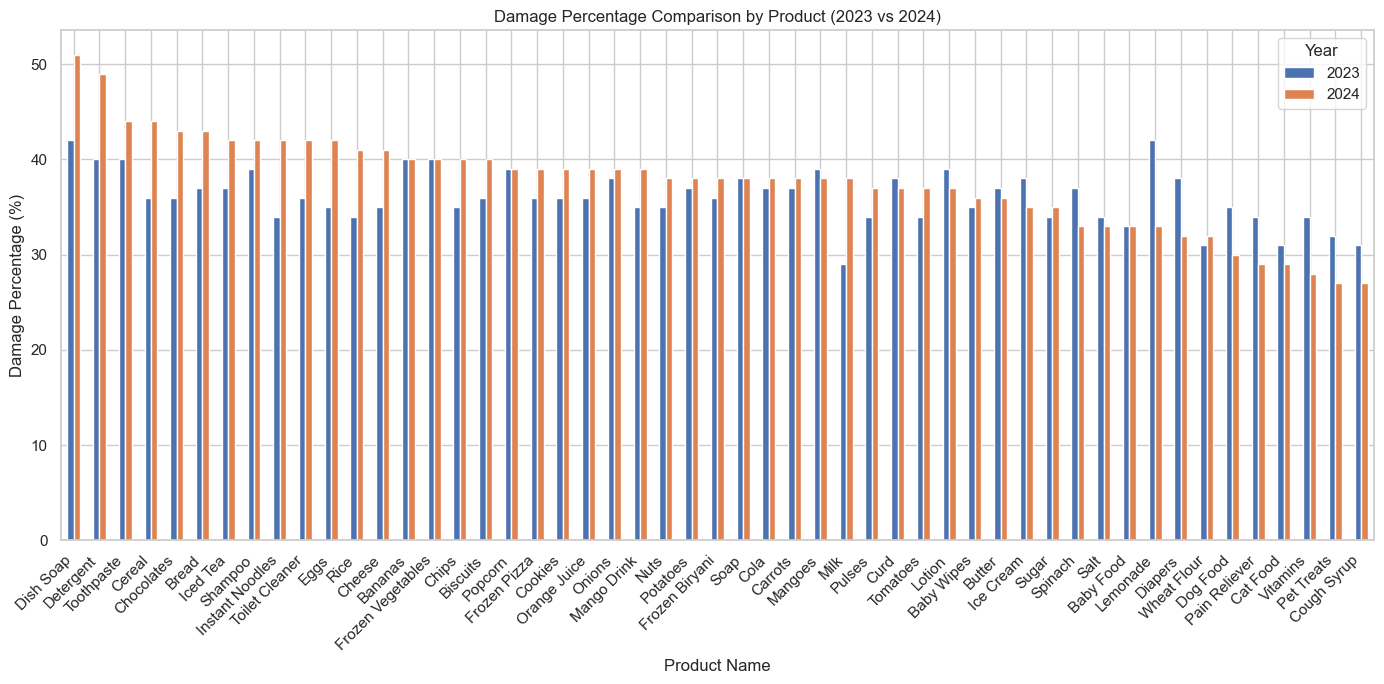

In [102]:
# Pivot to make 'year' as columns and 'product_name' as index
pivot_df = damage_per_prod.pivot(index='product_name', columns='year', values='damage_percent').fillna(0)

# Sort by 2024 damage percentage for better comparison
pivot_df = pivot_df.sort_values(by=2024, ascending=False)

# Plot grouped bar chart
pivot_df.plot(kind='bar', figsize=(14, 7))
plt.title("Damage Percentage Comparison by Product (2023 vs 2024)")
plt.ylabel("Damage Percentage (%)")
plt.xlabel("Product Name")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


From above visualization it clearly says for most of the product the damage percentage is higher in 2024 compared to 2023

To address this, there is a need for a deeper investigation into the root causes — such as identifying specific suppliers, evaluating packaging and transit conditions, and monitoring inventory handling at different stages. Understanding which suppliers or processes contribute to frequent product damage can help in pinpointing unreliable sources, improving vendor accountability, and implementing preventive measures.

Ultimately, these actions can lead to reduced product losses, improved operational efficiency, better product quality, and enhanced customer satisfaction.

**Category-Level Observations**

   Household Cleaning Products (Dish Soap, Detergent, Toilet Cleaner):Represent the highest damage percentages, with Dish Soap and Detergent at the top.

   Possible reasons: fragile packaging, chemical leakage, poor stacking during shipping.

   Personal Care Items (Toothpaste, Shampoo):Damage likely due to tubes bursting, bottle leaks, or temperature-sensitive packaging.

   Perishables (Bananas, Bread, Eggs, Mangoes):These have short shelf lives and are highly susceptible to damage from poor storage conditions or delays in inventory turnover.

   Frozen and Packaged Foods (Frozen Vegetables, Chocolates, Popcorn, Cereal):Damage could be due to temperature inconsistencies (e.g., freezer failure) or improper handling.

**Key Concerns**

   High Damage = High Cost: Damage rates above 35% indicate significant financial losses, wasted inventory, and potential reputational impact.

   Inventory Efficiency: Products like Bread, Bananas, and Eggs require tighter control on shelf-life and faster turnover.

   Hygiene and Safety: For products like Shampoo, Detergent, and Toothpaste, damage may also pose safety risks, affecting customer trust.

**Recommendations**

   Review Packaging and Handling Protocols:

   Reinforce packaging for fragile items like liquids and tubes.

   Use protective layers and stable stacking in transit.

   Implement Shelf-Life Tracking for perishables:

   Use inventory analytics to rotate stock based on expiry.

   Integrate FIFO (First-In First-Out) system more strictly.

**Warehouse Optimization:**

   Store temperature-sensitive items (e.g., chocolates, frozen items) in climate-controlled zones.

   Minimize overstocking of high-risk perishable products.

**Root Cause Investigation:**

   Audit the supply chain steps (supplier, transport, storage) for top damaged products.

   Implement real-time damage tracking with photo-based proof if feasible.





**Delivery Performance**

In [138]:
#import necessary data for delivery analysis

df_delivery=pd.read_csv("blinkit_delivery_performance(1).csv")

df_delivery

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic
...,...,...,...,...,...,...,...,...
4995,1669690997,90914,2023-12-25 16:05:20,2023-12-25 16:10:20,5.0,1.86,On Time,Traffic
4996,8340761903,27952,2023-11-27 09:38:43,2023-11-27 09:36:43,-2.0,3.31,On Time,NaN
4997,5936301790,9590,2024-06-21 19:23:09,2024-06-21 19:26:09,3.0,2.44,On Time,Traffic
4998,5710579377,29940,2024-06-06 15:12:13,2024-06-06 15:10:13,-2.0,1.76,On Time,NaN


In [104]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               5000 non-null   int64  
 1   delivery_partner_id    5000 non-null   int64  
 2   promised_time          5000 non-null   object 
 3   actual_time            5000 non-null   object 
 4   delivery_time_minutes  5000 non-null   float64
 5   distance_km            5000 non-null   float64
 6   delivery_status        5000 non-null   object 
 7   reasons_if_delayed     3098 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 312.6+ KB


**Data types for actual and delivery time is in object need to convert to datetime object 
and reason_if_delayed have null values  as if status is on time then it becomes null values**

In [139]:
#Convert  datypes of actual and delivery time to datetime object

df_delivery["promised_time"]=pd.to_datetime(df_delivery["promised_time"])

df_delivery["actual_time"]=pd.to_datetime(df_delivery["actual_time"])
df_delivery

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic
...,...,...,...,...,...,...,...,...
4995,1669690997,90914,2023-12-25 16:05:20,2023-12-25 16:10:20,5.0,1.86,On Time,Traffic
4996,8340761903,27952,2023-11-27 09:38:43,2023-11-27 09:36:43,-2.0,3.31,On Time,NaN
4997,5936301790,9590,2024-06-21 19:23:09,2024-06-21 19:26:09,3.0,2.44,On Time,Traffic
4998,5710579377,29940,2024-06-06 15:12:13,2024-06-06 15:10:13,-2.0,1.76,On Time,NaN


**The delivery_time_minutes value indicates the difference between the actual and promised delivery time. If the value is negative, it means the delivery was early or on time. If the value is positive, it means the delivery was delayed.**

Based on this, the delivery performance is categorized into three groups:

   **On Time**: Delivery time between -5 and +5 minutes (inclusive).

   **Slightly Delayed**: Delivery time between 6 and 15 minutes.

   **Significantly Delayed**: Delivery time of more than 15 minutes


In [112]:
#On time vs delayed

df_delivery["delivery_status"].value_counts()

delivery_status
On Time                  3470
Slightly Delayed         1037
Significantly Delayed     493
Name: count, dtype: int64

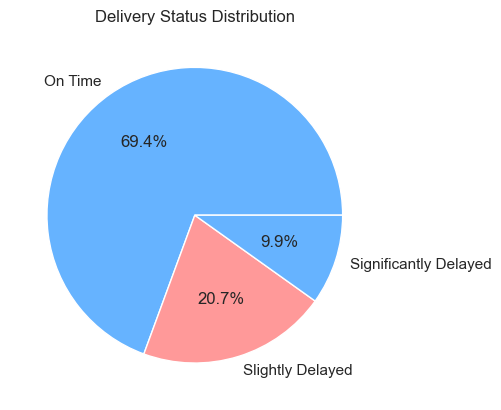

In [113]:
df_delivery['delivery_status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], title='Delivery Status Distribution')
plt.ylabel('')
plt.show()

**Based on the above visualization, the majority of orders — approximately 69.4% — were delivered on time. Around 20.7% experienced slight delays, while only 10% were significantly delayed. The common reason cited for delays across orders is traffic.**

**To gain deeper insight, it's essential to analyze the time periods during which these delays occur. This can help determine whether delays are concentrated during peak traffic hours, enabling better delivery planning and resource allocation..**

In [114]:
#Avg delivery time based on delivery status

df_delivery.groupby("delivery_status")[["delivery_time_minutes"]].mean().round(2).reset_index().rename(columns={"delivery_time_minutes":"avg_delivery_time"}).sort_values(by="avg_delivery_time",ascending=False)



,delivery_status,avg_delivery_time
1,Significantly Delayed,22.84
2,Slightly Delayed,10.52
0,On Time,0.01


**Approximately 10% of the orders were significantly delayed, with an average delay of 23 minutes, primarily due to traffic. To gain better insights, it's important to further analyze the specific areas and time ranges — particularly during peak hours — when these delays are most frequent. This will help identify patterns and opportunities for improving delivery efficiency.**

**Peak Hours for Significant Delivery Delays**

In [140]:
#Findig the peak hr 
df_significant = df_delivery[df_delivery['delivery_status'] == 'Significantly Delayed']

#extracting hr from actual_time
df_significant['hour_of_day'] = df_significant['actual_time'].dt.hour

df_significant

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed,hour_of_day
23,6905293278,53868,2024-06-16 10:36:23,2024-06-16 11:02:23,26.0,0.58,Significantly Delayed,Traffic,11
31,9073572548,28575,2023-05-02 23:25:42,2023-05-02 23:47:42,22.0,4.77,Significantly Delayed,Traffic,23
62,2149289255,25251,2024-11-01 15:20:29,2024-11-01 15:39:29,19.0,2.56,Significantly Delayed,Traffic,15
70,2122832513,39396,2024-02-17 19:58:14,2024-02-17 20:18:14,20.0,3.97,Significantly Delayed,Traffic,20
76,5127172657,80034,2024-06-11 18:30:31,2024-06-11 18:50:31,20.0,4.41,Significantly Delayed,Traffic,18
...,...,...,...,...,...,...,...,...,...
4919,2886463378,84279,2023-12-24 19:31:51,2023-12-24 19:54:51,23.0,2.15,Significantly Delayed,Traffic,19
4937,6999330116,52664,2023-04-13 00:24:06,2023-04-13 00:47:06,23.0,3.90,Significantly Delayed,Traffic,0
4952,4305377896,98259,2024-08-08 00:45:16,2024-08-08 01:10:16,25.0,3.68,Significantly Delayed,Traffic,1
4971,6457122136,18328,2023-05-19 07:54:24,2023-05-19 08:19:24,25.0,1.90,Significantly Delayed,Traffic,8


In [141]:
hourly_delay = df_significant['hour_of_day'].value_counts().sort_index()
hourly_delay

hour_of_day
0     15
1     21
2     20
3     31
4     18
5     23
6     28
7     15
8     30
9     20
10    18
11    21
12    20
13    31
14    22
15    13
16     6
17    20
18    17
19    25
20    22
21    19
22    25
23    13
Name: count, dtype: int64

In [142]:
hourly_delay = pd.Series({
    0: 15, 1: 21, 2: 20, 3: 31, 4: 18, 5: 23, 6: 28, 7: 15,
    8: 30, 9: 20, 10: 18, 11: 21, 12: 20, 13: 31, 14: 22, 15: 13,
    16: 6, 17: 20, 18: 17, 19: 25, 20: 22, 21: 19, 22: 25, 23: 13
})


#split am /pm and  find peak hrs
am_hours = hourly_delay[hourly_delay.index < 12]
pm_hours = hourly_delay[hourly_delay.index >= 12]



peak_am_hour = am_hours.idxmax()
peak_am_count = am_hours.max()

peak_pm_hour = pm_hours.idxmax()
peak_pm_count = pm_hours.max()

print(f"Peak AM Hour: {peak_am_hour}:00 with {peak_am_count} delays")
print(f"Peak PM Hour: {peak_pm_hour}:00 with {peak_pm_count} delays")


Peak AM Hour: 3:00 with 31 delays
Peak PM Hour: 13:00 with 31 delays


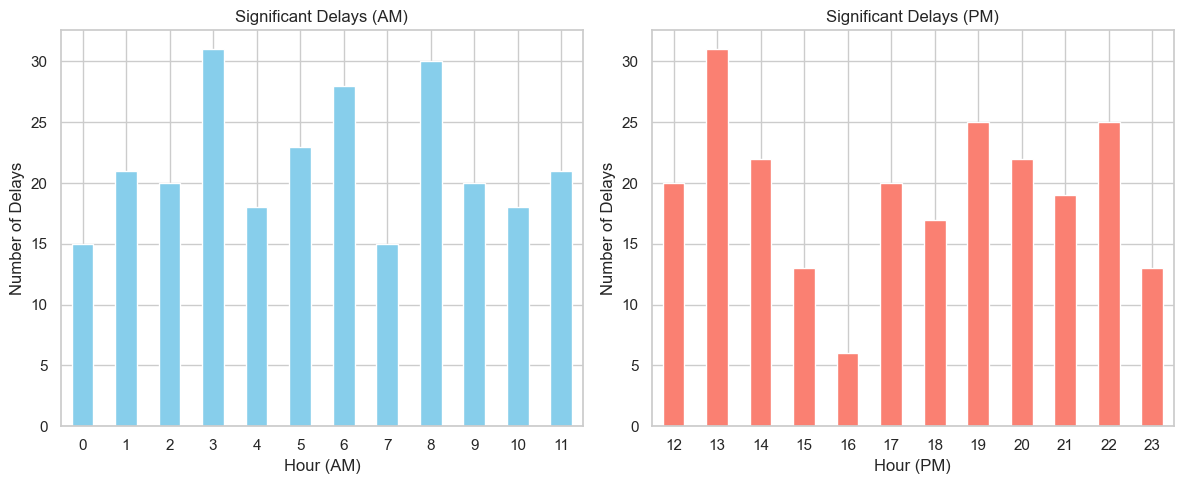

In [143]:

plt.figure(figsize=(12, 5))

# AM
plt.subplot(1, 2, 1)
am_hours.plot(kind='bar', color='skyblue')
plt.title('Significant Delays (AM)')
plt.xlabel('Hour (AM)')
plt.ylabel('Number of Delays')
plt.xticks(rotation=0)

# PM
plt.subplot(1, 2, 2)
pm_hours.plot(kind='bar', color='salmon')
plt.title('Significant Delays (PM)')
plt.xlabel('Hour (PM)')
plt.ylabel('Number of Delays')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


**The analysis of significantly delayed orders reveals notable peaks in delay frequency during early morning and evening hours. Specifically, the highest number of delays occurred around 3:00 AM, 6:00 AM, and 8:00 AM. While the 8:00 AM delays can be reasonably attributed to morning traffic congestion during peak commute hours, the 3:00 AM delays are likely influenced by other factors such as limited delivery workforce availability, operational constraints, or warehouse processing delays, as traffic is typically minimal at that time.**

**In the afternoon and evening, delays peak around 1:00 PM, followed by consistent delays at 7:00 PM, 8:00 PM, 9:00 PM, and 10:00 PM. These timeframes may align with lunch-hour traffic, post-work delivery surges, or route congestion in urban areas. And also this is overall hourly delays this can be varied depends upon area.**

**Understanding these patterns is crucial for optimizing delivery schedules, reallocating resources during high-delay periods, and addressing specific causes beyond just traffic—such as staffing, route planning, or batch processing delays.**

**Delivery Delay By Area**

In [144]:
#importing customer data set

df_customer=pd.read_csv("blinkit_customers.csv")
df_customer

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14
...,...,...,...,...,...,...,...,...,...,...,...
2495,48002829,Daksh Mandal,varkeymohammed@example.com,919587731286,"28/42, Venkataraman Ganj, Kishanganj-360157",Mumbai,45238,2024-01-25,Inactive,17,754.33
2496,57392064,Lavanya Jain,deshpandeom@example.com,916137420258,"391, Edwin Path, Korba 202726",Udupi,688100,2024-06-23,Regular,4,1540.81
2497,71688530,Umang Dash,gokhalenicholas@example.org,917595275963,"151, Parmer Ganj\nLoni 906431",Kavali,528749,2024-03-18,Regular,1,1541.22
2498,89051578,Zinal Natarajan,vyasfrado@example.com,911994009448,"H.No. 172, Khanna Street, Pudukkottai 610564",Alwar,586734,2024-09-06,Premium,12,1185.50


In [145]:
# merge data set
df_delivery_new = df_delivery.merge(df_order[['order_id', 'customer_id']], on='order_id', how='left')


df_delivery_new = df_delivery_new.merge(df_customer[['customer_id', 'area']], on='customer_id', how='left')

df_delivery_new

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed,customer_id,area
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN,30065862,Allahabad
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic,9573071,Thrissur
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic,45477575,Vellore
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN,88067569,Gaya
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic,83298567,Asansol
...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,90914,2023-12-25 16:05:20,2023-12-25 16:10:20,5.0,1.86,On Time,Traffic,62600289,Udaipur
4996,8340761903,27952,2023-11-27 09:38:43,2023-11-27 09:36:43,-2.0,3.31,On Time,NaN,53640286,Mathura
4997,5936301790,9590,2024-06-21 19:23:09,2024-06-21 19:26:09,3.0,2.44,On Time,Traffic,87059497,Jamshedpur
4998,5710579377,29940,2024-06-06 15:12:13,2024-06-06 15:10:13,-2.0,1.76,On Time,NaN,67310893,Chennai


In [123]:
area_total

,area,total
0,Adoni,18
1,Agartala,18
2,Agra,27
3,Ahmedabad,12
4,Ahmednagar,30
...,...,...
311,Vijayanagaram,8
312,Vijayawada,12
313,Visakhapatnam,21
314,Warangal,12


In [146]:
area_delay = df_delivery_new.groupby(['area', 'delivery_status']).size().reset_index(name='count')
area_total = df_delivery_new.groupby(['area']).size().reset_index(name='total')

# Merge and calculate percentage
area_delay = area_delay.merge(area_total, on='area')
area_delay['percentage'] = (area_delay['count'] / area_delay['total'] * 100).round(0)



pivot = area_delay.pivot(index='area', columns='delivery_status', values='percentage').fillna(0).reset_index()
pivot=pivot.sort_values(by="Significantly Delayed",ascending=False)
pivot.head(20)

delivery_status,area,On Time,Significantly Delayed,Slightly Delayed
230,Phusro,25.0,50.0,25.0
213,New Delhi,60.0,40.0,0.0
104,Gudivada,54.0,38.0,8.0
40,Bettiah,60.0,33.0,7.0
275,Solapur,56.0,33.0,11.0
283,Surendranagar Dudhrej,56.0,33.0,11.0
305,Uluberia,56.0,33.0,11.0
303,Ujjain,40.0,30.0,30.0
201,Nadiad,43.0,29.0,29.0
278,Sri Ganganagar,57.0,29.0,14.0


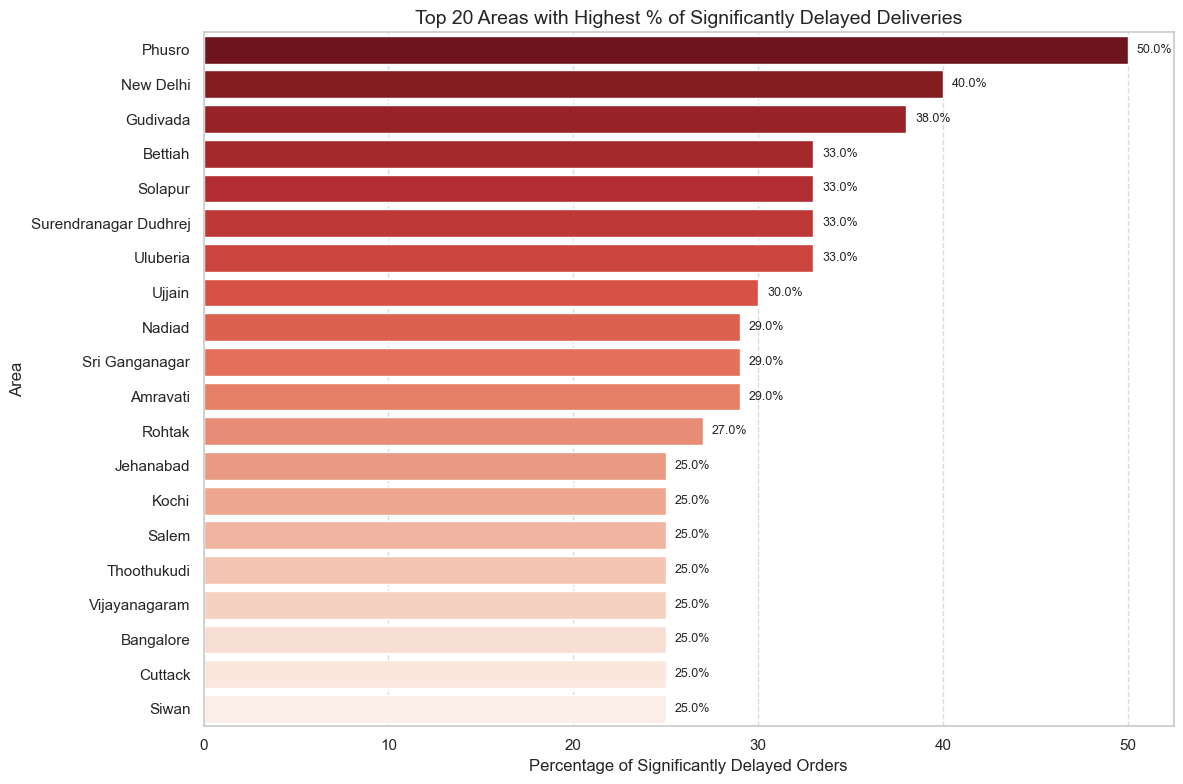

In [147]:
# Take top 20 areas with highest significantly delayed %
top20 = pivot.head(20)

# Set the plot size
plt.figure(figsize=(12, 8))

# Create horizontal bar chart
sns.barplot(
    data=top20,
    y='area',
    x='Significantly Delayed',
    palette='Reds_r'
)

# Add title and labels
plt.title('Top 20 Areas with Highest % of Significantly Delayed Deliveries', fontsize=14)
plt.xlabel('Percentage of Significantly Delayed Orders')
plt.ylabel('Area')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add percentage labels on bars
for index, value in enumerate(top20['Significantly Delayed']):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()


**Top 20 Region With High Delivery Delays**

The visualization highlights the top 20 regions with the highest percentage of significantly delayed deliveries. Areas like Phusro (50%), New Delhi (40%), Gudivada (38%), and Bettiah (33%) show considerable delays in order fulfillment.

These high delay rates raise important operational questions. While New Delhi is a well-known metropolitan hub likely affected by heavy traffic congestion, other towns such as Phusro and Gudivada may be facing delays due to limited logistics infrastructure, supply chain inefficiencies, or last-mile delivery challenges.

Additional factors to consider for these delays:

    Traffic congestion during peak hours

    Inadequate local delivery fleet coverage

    Warehouse or store inventory issues

    Longer distances from dispatch locations

    Unfavorable road or weather conditions

A deeper dive is recommended to identify the specific root causes in these regions. Analyzing parameters like order volume, delivery partner performance, inventory availability, and route optimization could help determine where interventions are needed.

**Delivery Delay By Product**

In [148]:
df_delivery_new=df_delivery_new.merge(df_order_items[["product_id","order_id"]],on="order_id",how="inner")
df_delivery_new

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed,customer_id,area,product_id
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN,30065862,Allahabad,642612
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic,9573071,Thrissur,378676
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic,45477575,Vellore,741341
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN,88067569,Gaya,561860
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic,83298567,Asansol,602241
...,...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,90914,2023-12-25 16:05:20,2023-12-25 16:10:20,5.0,1.86,On Time,Traffic,62600289,Udaipur,925482
4996,8340761903,27952,2023-11-27 09:38:43,2023-11-27 09:36:43,-2.0,3.31,On Time,NaN,53640286,Mathura,124290
4997,5936301790,9590,2024-06-21 19:23:09,2024-06-21 19:26:09,3.0,2.44,On Time,Traffic,87059497,Jamshedpur,491314
4998,5710579377,29940,2024-06-06 15:12:13,2024-06-06 15:10:13,-2.0,1.76,On Time,NaN,67310893,Chennai,319388


In [149]:
df_delivery_new=df_delivery_new.merge(df_product[["product_id","product_name","category"]],on="product_id",how="inner")
df_delivery_new


,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed,customer_id,area,product_id,product_name,category
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN,30065862,Allahabad,642612,Pet Treats,Pet Care
1,4926104391,13060,2023-10-24 08:02:01,2023-10-24 08:16:01,14.0,3.91,Slightly Delayed,Traffic,47206881,Nellore,642612,Pet Treats,Pet Care
2,5998035939,25912,2024-02-22 01:33:53,2024-02-22 01:31:53,-2.0,3.32,On Time,NaN,88324928,Alappuzha,642612,Pet Treats,Pet Care
3,202466684,51649,2023-08-08 06:16:23,2023-08-08 06:11:23,-5.0,1.48,On Time,NaN,74840437,Korba,642612,Pet Treats,Pet Care
4,2206269404,3395,2024-05-16 23:41:53,2024-05-16 23:38:53,-3.0,0.63,On Time,NaN,96009692,Bhagalpur,642612,Pet Treats,Pet Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3562901354,30335,2024-05-06 21:07:54,2024-05-06 21:07:54,0.0,4.33,On Time,NaN,5039883,Purnia,298985,Vitamins,Pharmacy
4996,7200105089,74324,2023-11-29 07:35:18,2023-11-29 07:48:18,13.0,4.30,Slightly Delayed,Traffic,24845814,Raipur,298985,Vitamins,Pharmacy
4997,7621954956,54741,2023-07-07 04:14:40,2023-07-07 04:10:40,-4.0,2.73,On Time,NaN,32797235,Guntakal,298985,Vitamins,Pharmacy
4998,608179182,62860,2024-08-01 08:41:48,2024-08-01 08:57:48,16.0,2.94,Significantly Delayed,Traffic,87220860,Kochi,298985,Vitamins,Pharmacy


In [136]:
df_delivery_new[df_delivery_new["delivery_status"]=="Significantly Delayed"]["category"].value_counts()

category
Snacks & Munchies        55
Pet Care                 54
Household Care           53
Pharmacy                 50
Personal Care            50
Dairy & Breakfast        49
Grocery & Staples        46
Fruits & Vegetables      46
Instant & Frozen Food    33
Cold Drinks & Juices     31
Baby Care                26
Name: count, dtype: int64

In [157]:
product_delay = df_delivery_new.groupby(['product_name', 'delivery_status']).size().reset_index(name='count')
product_delay

,product_name,delivery_status,count
0,Baby Food,On Time,85
1,Baby Food,Significantly Delayed,8
2,Baby Food,Slightly Delayed,22
3,Baby Wipes,On Time,132
4,Baby Wipes,Significantly Delayed,13
...,...,...,...
147,Vitamins,Significantly Delayed,19
148,Vitamins,Slightly Delayed,41
149,Wheat Flour,On Time,75
150,Wheat Flour,Significantly Delayed,15


In [160]:
pivot = product_delay.pivot(index='product_name', columns='delivery_status', values='count').fillna(0)
pivot['total'] = pivot.sum(axis=1)
pivot['significant_delay_pct'] = ((pivot['Significantly Delayed'] / pivot['total']) * 100).round(2)
pivot = pivot.sort_values(by='significant_delay_pct', ascending=False).reset_index()


In [164]:
pivot

delivery_status,product_name,On Time,Significantly Delayed,Slightly Delayed,total,significant_delay_pct
0,Ice Cream,25.0,12.0,13.0,50.0,24.00
1,Lemonade,12.0,4.0,5.0,21.0,19.05
2,Shampoo,51.0,12.0,17.0,80.0,15.00
3,Cookies,30.0,7.0,10.0,47.0,14.89
4,Nuts,40.0,10.0,20.0,70.0,14.29
5,Dish Soap,127.0,26.0,31.0,184.0,14.13
6,Dog Food,84.0,16.0,16.0,116.0,13.79
7,Curd,53.0,10.0,10.0,73.0,13.70
8,Wheat Flour,75.0,15.0,20.0,110.0,13.64
9,Bananas,31.0,6.0,8.0,45.0,13.33


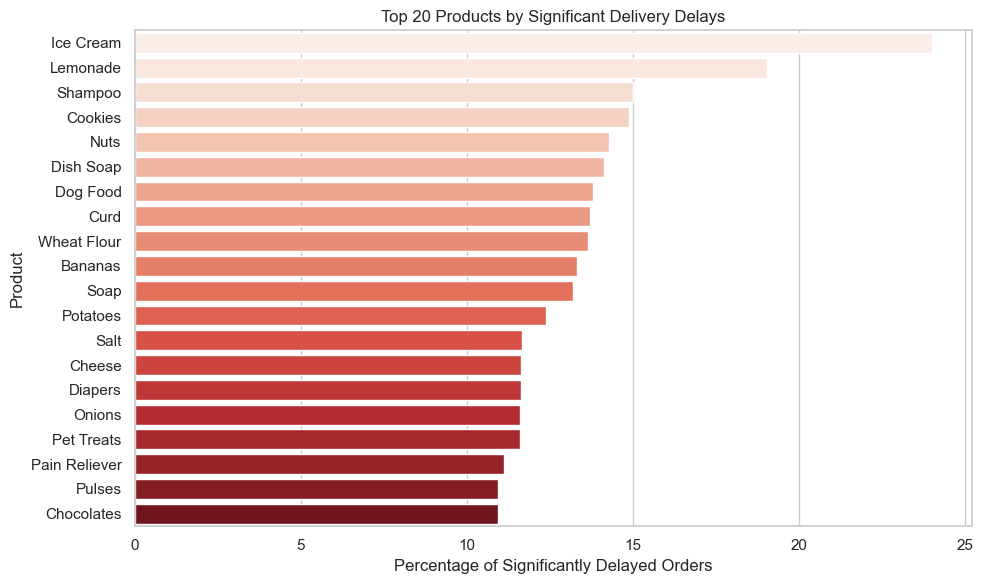

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

top_delayed = pivot.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_delayed, x='significant_delay_pct', y='product_name', palette='Reds')
plt.xlabel('Percentage of Significantly Delayed Orders')
plt.ylabel('Product')
plt.title('Top 20 Products by Significant Delivery Delays')
plt.tight_layout()
plt.show()


**Insight:**

>The analysis reveals that products such as **Ice Cream**, **Lemonade**, **Shampoo**, **Cookies**, and **Nuts** exhibit a **significantly higher percentage of delivery delays** compared to others.

**Implication:**

> This trend suggests there may be **underlying operational challenges** tied specifically to these products. For example, delays could stem from:

* **Cold chain requirements** (e.g., Ice Cream and Lemonade),
* **Inventory stocking issues**,
* **Packaging or vendor lead time problems**, or
* **High demand vs supply mismatch**.

**Recommended Action:**

> A **targeted discussion with store and logistics teams** is essential to:

* Investigate **storage, handling, and replenishment** procedures for these SKUs,
* Evaluate if these items are **sourced from farther warehouses**, and
* Explore the need for **adjusted delivery buffers or supplier optimization**.





Conclusion

This supply chain analysis provided comprehensive insights into Blinkit's operations across inventory management, product demand, and delivery performance. By exploring multiple dimensions of the supply chain, the analysis helps identify strengths and areas needing attention for operational efficiency.

   1) Top-Selling Product Categories: Identifying high-demand categories allows for better inventory planning and allocation to meet customer preferences and boost sales.

   2) Inventory Trends & Stock Flow: The monthly cumulative stock analysis, compared against minimum and maximum stock levels and demand, helped highlight potential overstocking or understocking issues, enabling more precise stock control.

   3) Demand Fluctuation by Category & Year: Tracking how product demand varies over time assists in seasonality forecasting and helps align procurement and replenishment strategies.

   4) Damaged Stock Analysis: Comparing damaged vs. received stock across years by product reveals quality issues or handling inefficiencies that can be mitigated to reduce waste and improve cost control.

   5) Delivery Performance Overview:


>**Delivery Status Distribution**: With nearly 70% of deliveries on time, 21% slightly delayed, and 10% significantly delayed, there's room for improvement, especially for the latter group.

>**Peak Hour Identification**: Significant delays frequently occurred during specific time windows (e.g., morning and evening peak hours), likely due to traffic, suggesting a need to optimize routing or shift schedules.

>**Area-Wise Delays**: Some areas (e.g., Phusro, New Delhi, Gudivada) show higher percentages of significantly delayed orders. These areas require further investigation into traffic patterns, last-mile delivery efficiency, or local operational constraints.

>**Product-Wise Delays**: Certain products like Ice Cream, Lemonade, Cookies, and Shampoo were more prone to significant delays. This may be due to special handling requirements, storage needs, or limited availability and should be discussed with store or logistics teams for resolution.

Overall, this analysis empowers Blinkit's supply chain team with actionable insights to enhance stock handling, optimize delivery processes, and elevate customer satisfaction through better performance visibility and data-driven decision-making.